<a href="https://colab.research.google.com/github/dsankush/Drug-Analysis/blob/main/Drug_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Required Libraries

In [ ]:
# To load data from file
import pandas as pd 

# To perform mathemetiacal operations
import numpy as np

from scipy import stats as st

# To visualize data and get insight from the data
import matplotlib.pyplot as plt
import seaborn as sns

# To avoid the warning that aren't necessarily exceptions
import warnings
warnings.filterwarnings('ignore')

# Sets the backend of seaborn to the 'inline' backend
sns.set()
# Sets the backend of matplotlib to the 'inline' backend
%matplotlib inline

# Pre-defining the font type and size to provide same throughout the code
font = {'family' : 'normal',
        'size'   : 16}
plt.rc('font', **font)

# Pre-defining the color schema
# Pre-defining the color schema
sns.set_palette('gist_ncar')

### Loading Dataset from csv file

In [ ]:
# Mounting drive and read the csv file
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Using pandas read_csv method to load the data
path = '/content/drive/MyDrive/Drug Analysis/drug200 (1).csv'
data = pd.read_csv(path)

### Getting the first 5 rows of the data.

In [ ]:
# using pandas head function.

data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


### Getting the last 5 rows of the data.

In [ ]:
# using pandas tail function.

data.tail()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX
199,40,F,LOW,NORMAL,11.349,drugX


### Getting the columns present in our data.

In [ ]:
# using pandas columns method

print('Columns in our data:')

data.columns.tolist()

Columns in our data:


['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug']

### Getting the shape of the data.

In [ ]:
# using pandas shape method to get the shape of our dataset

print('Shape of our dataset : ')
data.shape

Shape of our dataset : 


(200, 6)

In [ ]:
print('Number of columns : ',data.shape[1],'\n')

print('number of rows : ',data.shape[0])

Number of columns :  6 

number of rows :  200


* <b>Checking the data types of each column</b>

In [ ]:
data.dtypes

Age              int64
Sex             object
BP              object
Cholesterol     object
Na_to_K        float64
Drug            object
dtype: object

### Getting the type of data present in columns.

In [ ]:
# printing the number of numerical features and number of categorical features 

num_col = data.select_dtypes(include = 'number')
print("The number of Numerical columns are:",len(num_col.columns))

cat_col = data.select_dtypes(include = 'object')
print("\nThe number of Categorical columns are:",len(cat_col.columns))

The number of Numerical columns are: 2

The number of Categorical columns are: 4


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


#### Summary Statistic of the numeric columns

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,200.0,44.315000,16.544315,15.000,31.0000,45.0000,58.00,74.000
Na_to_K,200.0,16.084485,7.223956,6.269,10.4455,13.9365,19.38,38.247


#### Summary Statistic of object form data of columns

In [ ]:
data.describe(include = 'object').T

,count,unique,top,freq
Sex,200,2,M,104
BP,200,3,HIGH,77
Cholesterol,200,2,HIGH,103
Drug,200,5,DrugY,91


In [ ]:
# In our dataset there are lots of unique values in lots of columns 
# Getting the number of unique values present in these columns

# Using Dictionary Comprehension to get the dictionary of the columns containing more than 1 unique value

unique_count_dict = {column: len(data[column].unique()) for column in data.columns}

In [ ]:
# Creating seperate list of columns and count from the keys and values of the unique_count_dict

column_list = list(unique_count_dict.keys())
unique_value_count = list(unique_count_dict.values())

In [ ]:
# Creating the Dataframe to display the columns and there count of unique values

unique_count_df = pd.DataFrame({'Column_name' : column_list, 'Number_of_Unique_Values' : unique_value_count})

# Sorting this above unique_count_df in ascending order to get to count of unique values present in each column
# Also used reset_index to reset the index and drop the previous index as it was shuffled while sorting values

unique_count_df.sort_values(by = ['Number_of_Unique_Values']).reset_index(drop = True)

,Column_name,Number_of_Unique_Values
0,Sex,2
1,Cholesterol,2
2,BP,3
3,Drug,5
4,Age,57
5,Na_to_K,198


### Data Cleaning and Removal of duplicate enteries from the Data

As data cleaning is an important task before we perform any kind of analysis on dataset, we will remove or replace the not necessary data from our dataset so that we can get desired outputs by performing EDA on it.

We have perfrom following cleaning strategy to overcome the data ambiguity:


* Getting missing data
* Handling missing data
* Checking for duplicate data
* Removing duplicate data

In [ ]:
# Using isnull() from Pandas to get the Null/NaN values in the each column in dataset and 
# sum() is use to get the sum of missing values present in each column in dataset

print(data.isnull().sum())

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64


# Inference

* Here we can see that there is <b>no missing value</b> in any feature of our data.


* So we donot need to perform the missing value handling task

* <b>Checking for duplicate data</b>

In [ ]:
data[data.duplicated()].size

0

* There is also <b>not any duplicate data</b> present in our dataset.

# Exploratory Data Analysis

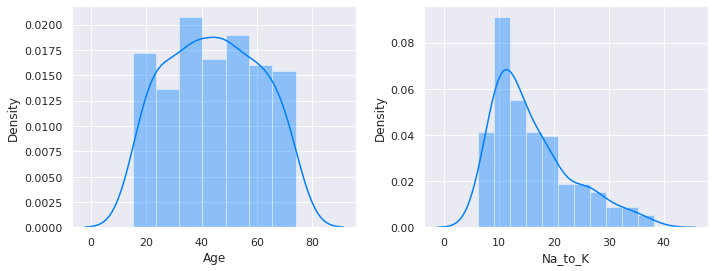

In [ ]:
# ploting distribution for each numerical variable present in our data set
# using distplot from seaborn

columns = data.select_dtypes(include=np.number).columns.tolist()

n = 1

plt.figure(figsize=(20,15))

for column in columns:   
    
    plt.subplot(4,4,n)
    
    n = n+1
    sns.distplot(data[column])
    
    plt.tight_layout()

### Outlier Detection

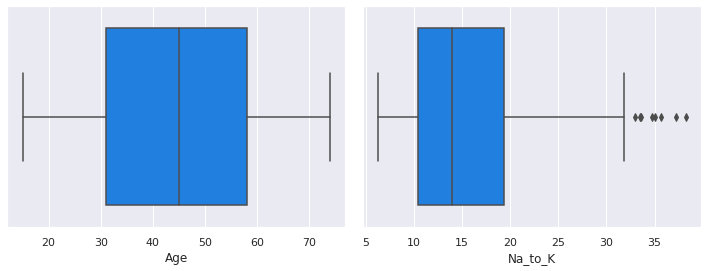

In [ ]:
# ploting the box plots into subplots of each column

columns = data.select_dtypes(include=np.number).columns.tolist()
n = 1

plt.figure(figsize=(20,15))

for column in columns:
    plt.subplot(4,4,n)
    n = n+1
    sns.boxplot(data[column])
    plt.tight_layout()
    

## Univariate Analysis

* <b>Let us go through variables individually and analyse them.</b>

#### Gender Column

In [ ]:
# Getting the value count for each gender using value_counts from pandas
data['Sex'].value_counts()

M    104
F     96
Name: Sex, dtype: int64

In [ ]:
# Percentage For each gender
(data['Sex'].value_counts() / data['Sex'].count()) * 100

M    52.0
F    48.0
Name: Sex, dtype: float64

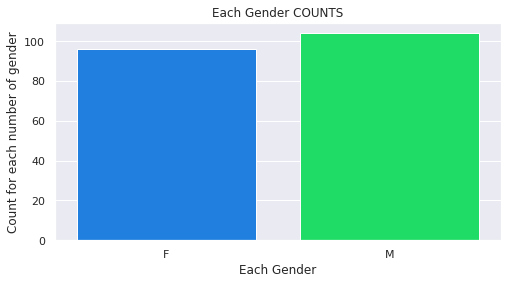

In [ ]:
# Ploting count plot for Gender column

plt.figure(figsize = (8, 4))

sns.countplot(data['Sex'])

plt.title('Each Gender COUNTS')

plt.xlabel('Each Gender')
plt.ylabel('Count for each number of gender')

plt.show()

#### BP(Blood Pressure) Column

In [ ]:
# Getting the value count for each BP category using value_counts from pandas
data['BP'].value_counts()

HIGH      77
LOW       64
NORMAL    59
Name: BP, dtype: int64

In [ ]:
# Percentage For Each level of BP
(data['BP'].value_counts() / data['BP'].count()) * 100

HIGH      38.5
LOW       32.0
NORMAL    29.5
Name: BP, dtype: float64

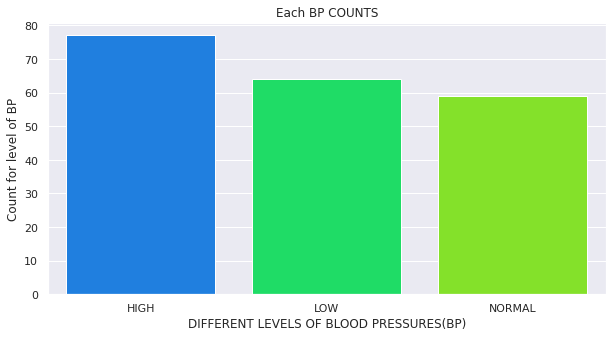

In [ ]:
# Ploting count plot for BP column

plt.figure(figsize = (10, 5))

sns.countplot(data['BP'])

plt.title('Each BP COUNTS')

plt.xlabel('DIFFERENT LEVELS OF BLOOD PRESSURES(BP)')
plt.ylabel('Count for level of BP')

plt.show()

####  Cholesterol Column

In [ ]:
# Getting the value count for each Cholesterol using value_counts from pandas
data['Cholesterol'].value_counts()

HIGH      103
NORMAL     97
Name: Cholesterol, dtype: int64

In [ ]:
# Percentage For Each level of Cholesterol
(data['Cholesterol'].value_counts() / data['Cholesterol'].count()) * 100

HIGH      51.5
NORMAL    48.5
Name: Cholesterol, dtype: float64

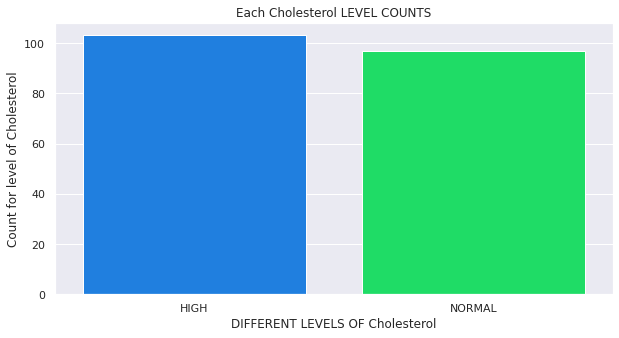

In [ ]:
# Ploting count plot for Cholesterol column

plt.figure(figsize = (10, 5))

sns.countplot(data['Cholesterol'])

plt.title('Each Cholesterol LEVEL COUNTS')

plt.xlabel('DIFFERENT LEVELS OF Cholesterol')
plt.ylabel('Count for level of Cholesterol')

plt.show()

####  Drug Column

In [ ]:
# Getting the value count for each Drug Category using value_counts from pandas
data['Drug'].value_counts()

DrugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: Drug, dtype: int64

In [ ]:
# Percentage For Each Drug Category
(data['Drug'].value_counts() / data['Drug'].count()) * 100

DrugY    45.5
drugX    27.0
drugA    11.5
drugC     8.0
drugB     8.0
Name: Drug, dtype: float64

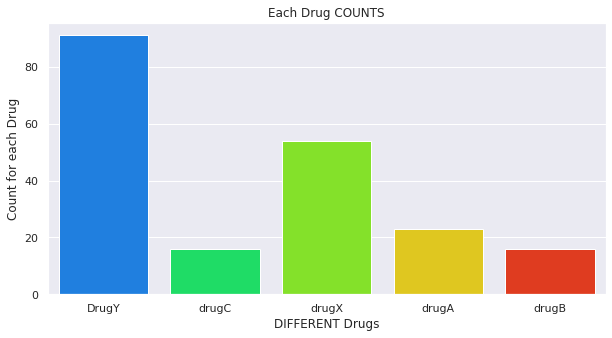

In [ ]:
# Ploting count plot for Drug column

plt.figure(figsize = (10, 5))

sns.countplot(data['Drug'])

plt.title('Each Drug COUNTS')

plt.xlabel('DIFFERENT Drugs')
plt.ylabel('Count for each Drug')

plt.show()

In [ ]:
data.Drug.unique().tolist()

['DrugY', 'drugC', 'drugX', 'drugA', 'drugB']

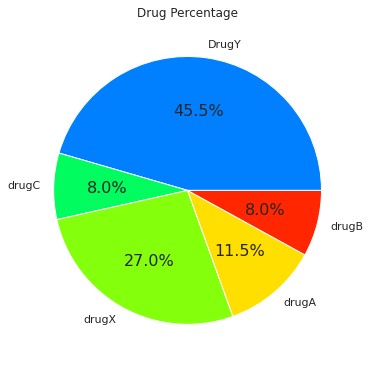

In [ ]:
#Visualizing percentages For Each Drug

int_percntg = abs(len(data[data['Drug'] == 1])/len(data)*100)

non_int_percntg = abs(len(data[data['Drug'] == 0])/len(data)*100)

total_prcntg = [45.5,8.0,27.0,11.5,8.0]

# Creating a pie chart
plt.figure(figsize = (6,8))

plt.pie(total_prcntg, labels = data.Drug.unique().tolist(), autopct = '%.1f%%')

plt.title('Drug Percentage')

plt.show()

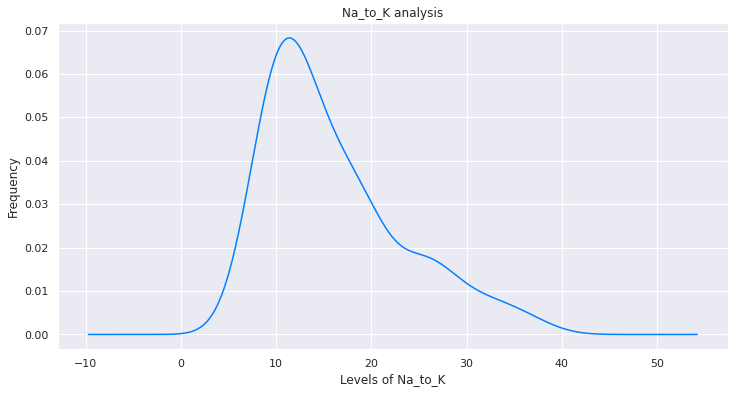

In [ ]:
# ploting bar graph for each Drug Consumption from each gender 

data['Na_to_K'].plot(kind = 'density', figsize = (12, 6))

plt.title("Na_to_K analysis")

plt.xlabel('Levels of Na_to_K')
plt.ylabel('Frequency')

plt.show()

## Bivariate and  Multivariate Analysis`

### Let us now analyse our features with target variable and extract more insights from our data visually.

* <b> Comparing Gender and Drug Column.</b>

In [ ]:
sns.set_palette("Set2")

In [ ]:
gender_wise_drug = data.groupby(['Drug','Sex']).size()
gender_wise_drug = gender_wise_drug.unstack()
gender_wise_drug

Sex,F,M
Drug,,
DrugY,47,44
drugA,9,14
drugB,6,10
drugC,7,9
drugX,27,27


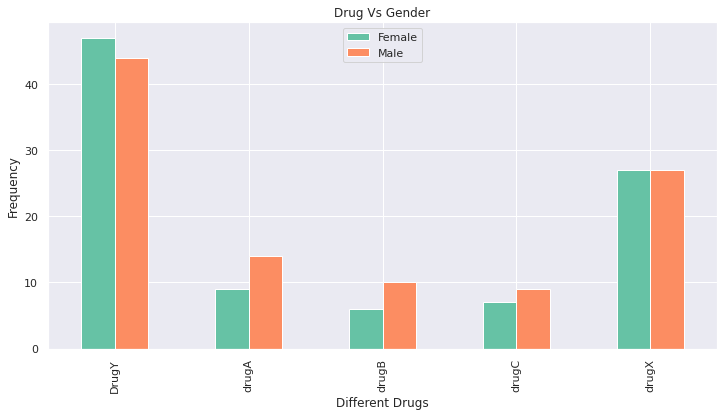

In [ ]:
# ploting bar graph for each Drug Consumption from each gender 

gender_wise_drug.plot(kind = 'bar', figsize = (12, 6))

plt.title("Drug Vs Gender")

plt.xlabel('Different Drugs')
plt.ylabel('Frequency')

plt.legend(['Female', 'Male'], loc = 'upper center')

plt.show()

* <b> Comparing Gender and Cholesterol Column.</b>

In [ ]:
gender_wise_cholesterol = data.groupby(['Cholesterol','Sex']).size()
gender_wise_cholesterol = gender_wise_cholesterol.unstack()
gender_wise_cholesterol

Sex,F,M
Cholesterol,,
HIGH,49,54
NORMAL,47,50


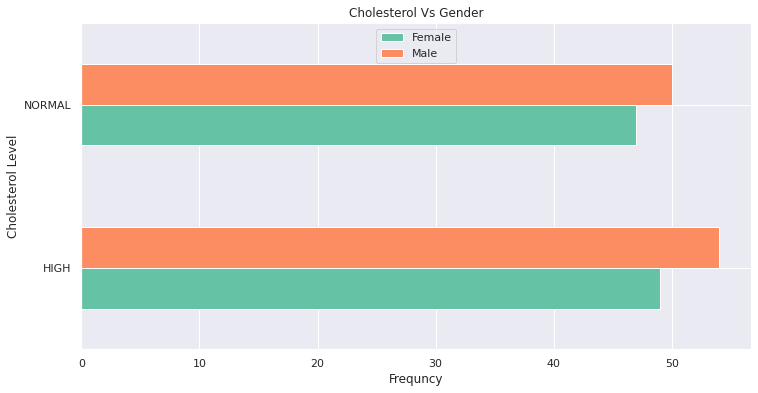

In [ ]:
# ploting bar graph for each Cholesterol Levels for each gender 

gender_wise_cholesterol.plot(kind = 'barh', figsize = (12, 6))

plt.title("Cholesterol Vs Gender")

plt.xlabel('Frequncy')
plt.ylabel('Cholesterol Level')

plt.legend(['Female', 'Male'], loc = 'upper center')

plt.show()

* <b> Comparing Gender and BP Column.</b>

In [ ]:
gender_wise_bp = data.groupby(['BP','Sex']).size()
gender_wise_bp = gender_wise_bp.unstack()
gender_wise_bp

Sex,F,M
BP,,
HIGH,38,39
LOW,28,36
NORMAL,30,29


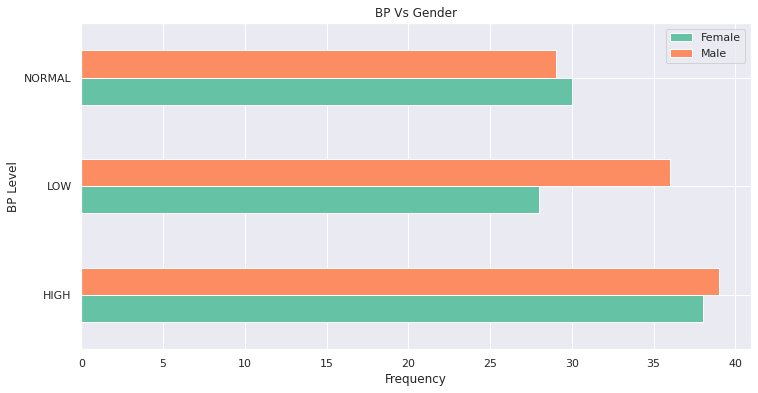

In [ ]:
# ploting bar graph for each BP Levels for each gender 

gender_wise_bp.plot(kind = 'barh', figsize = (12, 6))

plt.title("BP Vs Gender")

plt.xlabel('Frequency')
plt.ylabel('BP Level')

plt.legend(['Female', 'Male'], loc = 'upper right')

plt.show()

* <b> Comparing Cholesterol and BP Column.</b>

In [ ]:
cholesterol_level_bp = data.groupby(['BP'])['Cholesterol'].count()
cholesterol_level_bp

BP
HIGH      77
LOW       64
NORMAL    59
Name: Cholesterol, dtype: int64

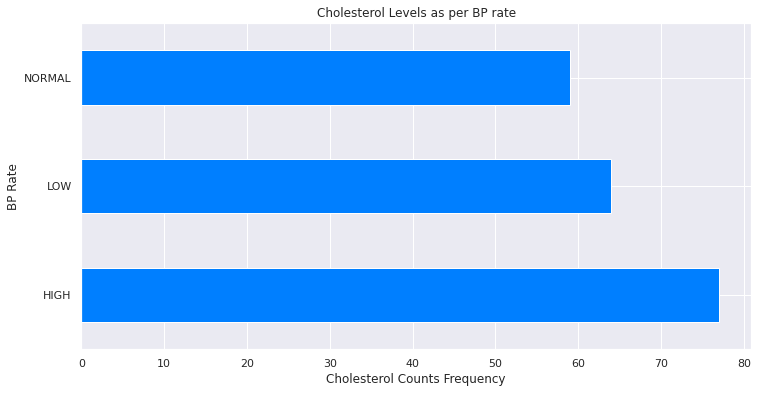

In [ ]:
# ploting bar graph for each BP rate with cholesterol count frequency 

sns.set_palette("gist_ncar")
cholesterol_level_bp.plot(kind = 'barh', figsize = (12, 6))

plt.title("Cholesterol Levels as per BP rate")

plt.xlabel('Cholesterol Counts Frequency')
plt.ylabel('BP Rate')

plt.show()

* <b> Age wise Drug Consumption</b>

In [ ]:
age_wise_drug = data.groupby(['Drug'])['Age'].count()
age_wise_drug = age_wise_drug.sort_values(ascending = False)
age_wise_drug

Drug
DrugY    91
drugX    54
drugA    23
drugB    16
drugC    16
Name: Age, dtype: int64

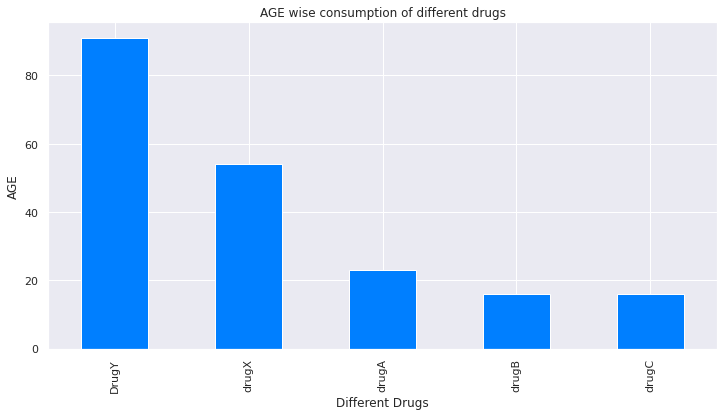

In [ ]:
# ploting bar graph for each with drug consumed by different ages

sns.set_palette("gist_ncar")
age_wise_drug.plot(kind = 'bar', figsize = (12, 6))

plt.title("AGE wise consumption of different drugs")

plt.xlabel('Different Drugs')
plt.ylabel('AGE')

plt.show()

* <b> Age wise Cholesterol Levels</b>

<Figure size 720x360 with 0 Axes>

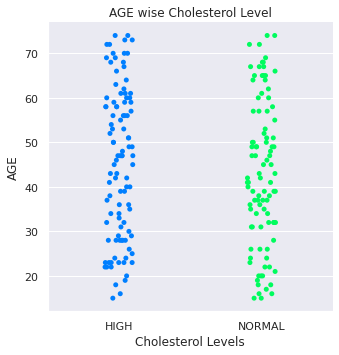

In [ ]:
# ploting bar graph for each with Cholesterol level at different ages

plt.figure(figsize = (10, 5))

sns.set_palette("gist_ncar")

sns.catplot(data = data, x = 'Cholesterol', y = 'Age')

plt.title("AGE wise Cholesterol Level")

plt.xlabel('Cholesterol Levels')
plt.ylabel('AGE')

plt.show()

#### <b>Creating a column that will contain age group</b>

In [ ]:
bins=[12, 19, 60, 100]
labels=['Teen', 'Adult', 'Older']

In [ ]:
data['age_group'] = pd.cut(data['Age'], bins, labels=labels)

In [ ]:
data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug,age_group
0,23,F,HIGH,HIGH,25.355,DrugY,Adult
1,47,M,LOW,HIGH,13.093,drugC,Adult
2,47,M,LOW,HIGH,10.114,drugC,Adult
3,28,F,NORMAL,HIGH,7.798,drugX,Adult
4,61,F,LOW,HIGH,18.043,DrugY,Older


### <b>Here we ca see that we have successfully created a column called age_group that contains age group of the given age</b>

<b>Lets explore this column with other columns</b>

### Comparing age group wise cholesterol rate

In [ ]:
age_group_cholesterol = data.groupby(['age_group','Cholesterol']).size()
age_group_cholesterol = age_group_cholesterol.unstack()

In [ ]:
age_group_cholesterol

Cholesterol,HIGH,NORMAL
age_group,,
Teen,4,8
Adult,78,70
Older,21,19


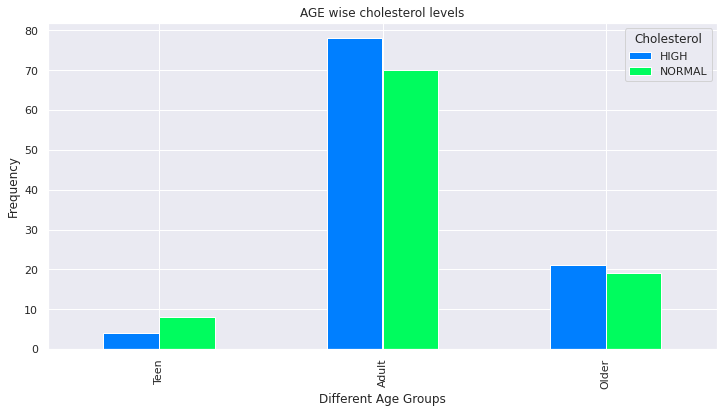

In [ ]:
sns.set_palette("gist_ncar")
age_group_cholesterol.plot(kind = 'bar', figsize = (12, 6))

plt.title("AGE wise cholesterol levels")

plt.xlabel('Different Age Groups')
plt.ylabel('Frequency')

plt.show()

### Comparing age group wise BP rate

In [ ]:
age_group_bp = data.groupby(['age_group','BP']).size()
age_group_bp = age_group_bp.unstack()

In [ ]:
age_group_bp

BP,HIGH,LOW,NORMAL
age_group,,,
Teen,8,1,3
Adult,55,49,44
Older,14,14,12


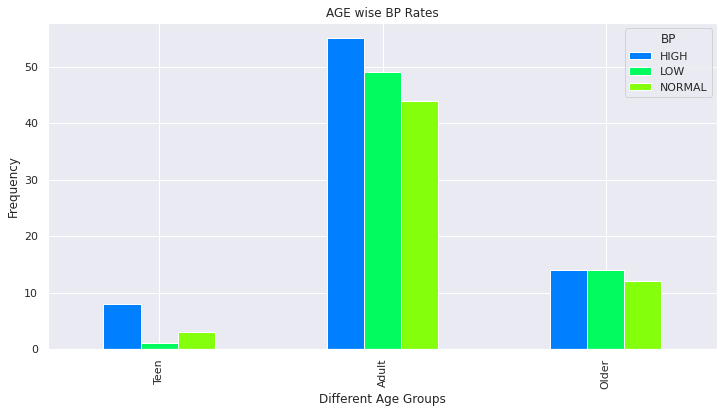

In [ ]:
sns.set_palette("gist_ncar")
age_group_bp.plot(kind = 'bar', figsize = (12, 6))

plt.title("AGE wise BP Rates")

plt.xlabel('Different Age Groups')
plt.ylabel('Frequency')

plt.show()

### <b>Multivariate Analysis:</b>
* When more than two variables must be studied at the same time, multivariate analysis is required. Because it is extremely difficult for the human brain to visualise a link between four variables in a graph, multivariate analysis is used to investigate increasingly complicated data sets.

### Let us compare each drug age wise on which is used for cholesterol

In [ ]:
age_drug_cholesterol = data.groupby(['age_group','Cholesterol','Drug']).size()
age_drug_cholesterol = age_drug_cholesterol.unstack()

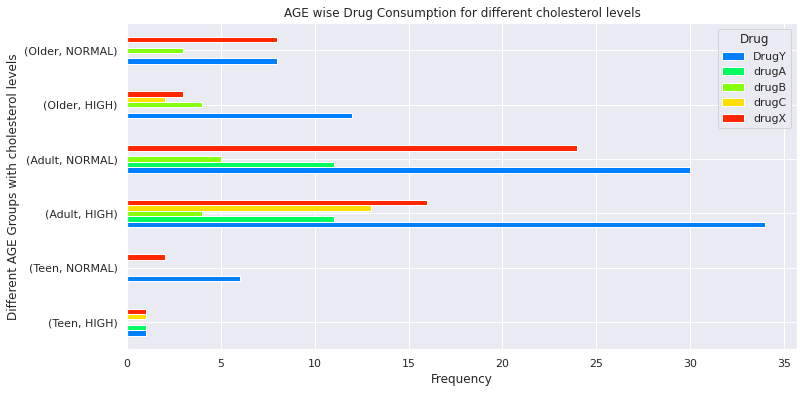

In [ ]:
sns.set_palette("gist_ncar")
age_drug_cholesterol.plot(kind = 'barh', figsize = (12, 6))

plt.title("AGE wise Drug Consumption for different cholesterol levels")

plt.xlabel('Frequency')
plt.ylabel('Different AGE Groups with cholesterol levels')

plt.show()

### Let us compare each drug age wise on which is used for BP

In [ ]:
age_drug_bp = data.groupby(['age_group','BP','Drug']).size()
age_drug_bp = age_drug_bp.unstack()
age_drug_bp

Drug              DrugY  drugA  drugB  drugC  drugX
age_group BP                                       
Teen      HIGH        7      1      0      0      0
          LOW         0      0      0      1      0
          NORMAL      0      0      0      0      3
Adult     HIGH       24     22      9      0      0
          LOW        23      0      0     13     13
          NORMAL     17      0      0      0     27
Older     HIGH        7      0      7      0      0
          LOW         7      0      0      2      5
          NORMAL      6      0      0      0      6

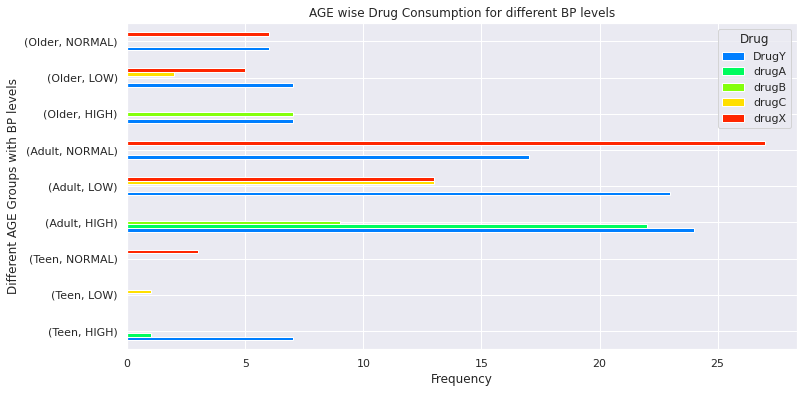

In [ ]:
sns.set_palette("gist_ncar")
age_drug_bp.plot(kind = 'barh', figsize = (12, 6))

plt.title("AGE wise Drug Consumption for different BP levels")

plt.xlabel('Frequency')
plt.ylabel('Different AGE Groups with BP levels')

plt.show()

### Let us compare each drug with Na_to_K for cholesterol

In [ ]:
age_drug_na_to_k = data.groupby(['Cholesterol','Na_to_K','Drug']).size()
age_drug_na_to_k

Cholesterol  Na_to_K  Drug 
HIGH         6.769    drugC    1
             7.298    drugC    1
             7.477    drugX    1
             7.490    drugA    1
             7.761    drugX    1
                              ..
NORMAL       31.876   DrugY    1
             32.922   DrugY    1
             33.542   DrugY    1
             34.997   DrugY    1
             35.639   DrugY    1
Length: 199, dtype: int64

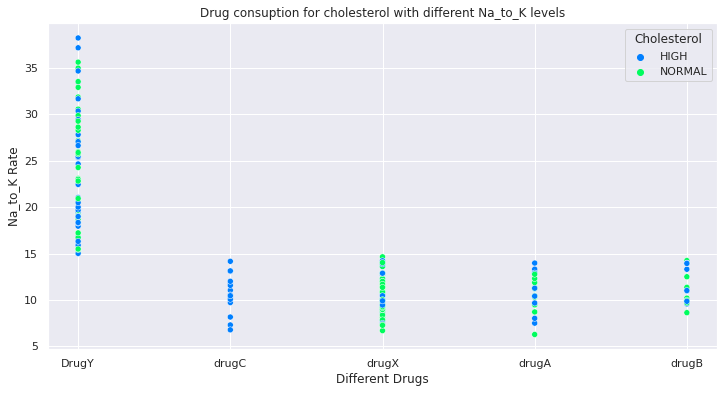

In [ ]:
plt.figure(figsize = (12,6))

sns.scatterplot(data = data, x = 'Drug',y = 'Na_to_K', hue = 'Cholesterol')

plt.title('Drug consuption for cholesterol with different Na_to_K levels')
plt.xlabel('Different Drugs')
plt.ylabel('Na_to_K Rate')

plt.show()

### <b>Converting our categorical features to numeric features</b>

In [ ]:
# Taking all categorical column list to a variable cols
new_data = data.drop(['Drug'], axis = 1)

In [ ]:
# Using getdummies function from pandas to convert categorical to numeric

new_data = pd.get_dummies(new_data)

In [ ]:
# printing the number of numerical features and number of categorical features 

num_col = new_data.select_dtypes(include = 'number')
print("\nThe number of Numerical columns are:",len(num_col.columns))

cat_col = new_data.select_dtypes(include = 'object')
print("\nThe number of Categorical columns are:",len(cat_col.columns))


The number of Numerical columns are: 12

The number of Categorical columns are: 0


In [ ]:
new_data = new_data.join(data['Drug'])

In [ ]:
new_data.head()

,Age,Na_to_K,Sex_F,Sex_M,BP_HIGH,BP_LOW,BP_NORMAL,Cholesterol_HIGH,Cholesterol_NORMAL,age_group_Teen,age_group_Adult,age_group_Older,Drug
0,23,25.355,1,0,1,0,0,1,0,0,1,0,DrugY
1,47,13.093,0,1,0,1,0,1,0,0,1,0,drugC
2,47,10.114,0,1,0,1,0,1,0,0,1,0,drugC
3,28,7.798,1,0,0,0,1,1,0,0,1,0,drugX
4,61,18.043,1,0,0,1,0,1,0,0,0,1,DrugY


## <b>Checking Correlation in the whole dataset</b>

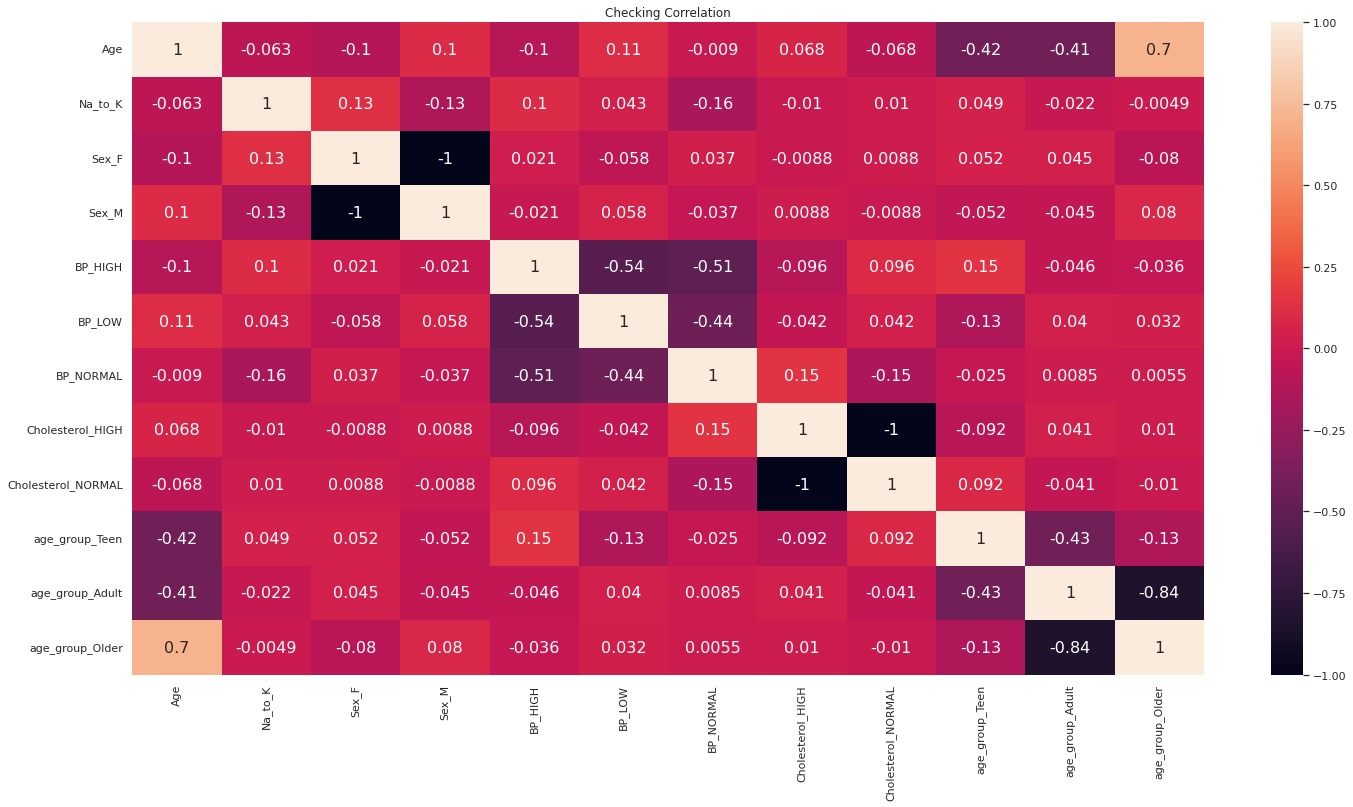

In [ ]:
# Checking Correlation

plt.figure(figsize=(24,12))

cor = new_data.corr() # getting correlation using corr() function

sns.heatmap(cor, annot=True)

plt.title("Checking Correlation")
plt.show()

In [ ]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [ ]:
# Calling the finction with threshold value 0.8.

corr_features = correlation(data, 0.8)
print('Number of correlated features :',len(set(corr_features))) # getting the length of the number of correlated features

Number of correlated features : 0


In [ ]:
print('Correlated Features :')
corr_features

Correlated Features :


set()

### Inference :
* As we can see that there is no correlated features 

#### Seperating out features and target variables to x and y variables

In [ ]:
# first we make a copy of out data set to a new variable

final_data = new_data.copy()

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
# seperating our data in feature and target varibles
x = final_data.drop(['Drug'], axis = 1)

# taking our target variable 
y = le.fit_transform(final_data['Drug'])

In [ ]:
# importing standard scaler from sklearn
from sklearn.preprocessing import StandardScaler

# importing Logistic regression from sklearn
from sklearn.linear_model import LogisticRegression

# importing decision tree Classifier from sklearn
from sklearn.tree import DecisionTreeClassifier

# importing randon forest classifier from sklearn
from sklearn.ensemble import RandomForestClassifier

# importing KNN classifier from sklearn
from sklearn.neighbors import KNeighborsClassifier

# Importing XGB Classifier from XGBOOST
import xgboost

# importing various matrics that well help us to analyze our classificationmodel
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.metrics import confusion_matrix,roc_auc_score,classification_report
from sklearn.metrics import roc_auc_score, roc_curve

# importing cross validation dependencies from sklearn
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

### Spliting our data into train and test variables

In [ ]:
# using train test split from sklearn
from sklearn.model_selection import train_test_split

In [ ]:
# giving 30% data for testing and 70% for training the model

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1)

In [ ]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((140, 12), (60, 12), (140,), (60,))

In [ ]:
# list of models

models = [LogisticRegression, KNeighborsClassifier, DecisionTreeClassifier, RandomForestClassifier, xgboost]

# function that will fit our models and train our models
def modeling(models):
    scores = []
    
    for i in models:
        
        if i == LogisticRegression:
            
            # Creating instance for our model
            model = LogisticRegression(multi_class='multinomial', solver='lbfgs', penalty='l2', C=1.0)
            
            # fitting our model using .fit funtion
            model.fit(x_train,y_train)
            
            # taking prediction from our model using .predict function
            print('Prediction by Logistic Regression :\n', model.predict(x_test))

            # appending scores to the list
            scores.append(model_results(model.predict(x_test)))  
            
        elif i == KNeighborsClassifier:
            
            # Creating instance for our model
            model = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
            
            # fitting our model using .fit funtion
            model.fit(x_train,y_train)
            
            # taking prediction from our model using .predict function
            print('\nPrediction by KNeighborsClassifier :\n', model.predict(x_test))

            # appending scores to the list
            scores.append(model_results(model.predict(x_test)))
            
            
        
    
        elif i == DecisionTreeClassifier:
            
            # Creating instance for our model
            model = DecisionTreeClassifier()
            
            # fitting our model using .fit funtion
            model.fit(x_train,y_train)

            # taking prediction from our model using .predict function
            print('\nPrediction by DecisionTreeClassifier :\n', model.predict(x_test))

            # appending scores to the list
            scores.append(model_results(model.predict(x_test))) 
            
            
            
        elif i == RandomForestClassifier:
            
             # Creating instance for our model
            model = RandomForestClassifier(n_estimators = 10 , max_depth = 10)
            
            # fitting our model using .fit funtion
            model.fit(x_train,y_train)
            
            # taking prediction from our model using .predict function
            print('\nPrediction by RandomForestClassifier :\n', model.predict(x_test))

            # appending scores to the list
            scores.append(model_results(model.predict(x_test)))
            
        elif i == xgboost:
            
             # Creating instance for our model
            model = xgboost.XGBClassifier()
            
            # fitting our model using .fit funtion
            model.fit(x_train,y_train)
            
            # taking prediction from our model using .predict function
            print('\nPrediction by RandomForestClassifier :\n', model.predict(x_test))

            # appending scores to the list
            scores.append(model_results(model.predict(x_test)))
            
     
    #printing all the scores for each model
    result = pd.concat(scores).reset_index(drop = True)
    return result.set_index(pd.Series(['LogisticRegression', 'KNeighborsClassifier', 
                                       'DecisionTreeClassifier', 'RandomForestClassifier', 'XGBOOST']))
    

In [ ]:
# Function that will calculate the accuracy, r2 and RMSE scores

def model_results(y_predicted):
    
    # Checking various matrics for our model    

    # Checking Accuracy
    accuracy = accuracy_score(y_test, y_predicted)

    # Checking Recall
    recall = recall_score(y_test, y_predicted,average='weighted')

    # Checking Precision
    precision = precision_score(y_test, y_predicted, average = 'weighted')

    # Checking f1 score
    f1_score_eval = f1_score(y_test, y_predicted, average = 'weighted')

    # Printing our classification report
    #print(classification_report(y_test, y_predicted))
        
    matrics_name = ['Accuracy', 'Recall', 'Precision', 'f1_score', 'y_predicted']
    matrics_value = [accuracy, recall, precision, f1_score_eval, y_predicted]
    
    total_matrics = dict(zip(matrics_name,matrics_value))

    df = pd.DataFrame(data = [total_matrics])
    return df

In [ ]:
data['Drug'].unique()

array(['DrugY', 'drugC', 'drugX', 'drugA', 'drugB'], dtype=object)

In [ ]:
def confusion_matrix_plot(df):
    
    plt.figure(figsize=(26, 13))
    n = 1
    #confusion_df = []
    
    total_confusion_matrix = []
    
    for i in range(len(df['y_predicted'])):
        confusion_matrix_eval =  confusion_matrix(y_test, df['y_predicted'][i], labels = [0,1,2,3,4])
    
    # Converting our confusion matrix to dataframe
        confusion_matrix_df = pd.DataFrame(data = confusion_matrix_eval,
                                           index =['DrugY', 'drugC', 'drugX', 'drugA', 'drugB'],
                                           columns = ['DrugY', 'drugC', 'drugX', 'drugA', 'drugB'])
        print('\n' + 'Confusion Matrix for ' + df.index[i] + '\n',confusion_matrix_df)
        
        plt.subplot(3,3,n)
        n = n + 1 
        
        # Ploting Confusion Matrix for each model
        sns.heatmap(confusion_matrix_df, annot = True, cmap = 'Greens')
        
        plt.title('Confusion Matrix for ' + df.index[i], fontsize = 20)
        plt.tight_layout()
        

In [ ]:
def clf_report(df):
    for i in range(len(df)):
        print('\nClassification report : ' + df.index[i] +  '\n')
        
        print(classification_report(y_test, df['y_predicted'][i]))

### Model Building

In [ ]:
# Training our model and getting the predictions done by our different models
result = modeling(models)

Prediction by Logistic Regression :
 [4 0 4 3 0 4 4 0 0 0 4 3 0 4 2 1 4 4 2 0 4 4 4 3 2 4 4 0 2 4 3 0 0 0 1 0 1
 0 0 0 2 0 0 4 2 0 4 4 0 2 0 0 0 0 0 0 4 4 4 1]

Prediction by KNeighborsClassifier :
 [2 0 4 1 0 4 4 0 0 0 3 1 0 0 1 1 1 1 4 0 4 2 4 2 4 0 4 0 2 3 2 0 0 0 1 0 0
 0 0 0 2 0 0 4 4 0 4 1 0 4 0 0 0 0 0 0 2 4 4 4]

Prediction by DecisionTreeClassifier :
 [4 0 4 3 0 4 4 0 0 0 4 3 0 0 1 1 4 4 2 0 4 4 4 0 2 4 4 0 3 4 3 0 0 0 1 0 1
 0 0 0 2 0 0 4 2 0 4 4 0 1 0 0 0 0 0 0 4 4 4 1]

Prediction by RandomForestClassifier :
 [4 0 4 3 0 4 4 0 0 0 4 3 0 0 1 1 4 4 2 0 4 4 4 0 2 4 4 0 4 4 2 0 0 0 1 0 1
 0 0 0 2 0 0 4 2 0 4 4 0 1 0 0 0 0 0 0 4 4 4 1]
[18:23:32] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

Prediction by RandomForestClassifier :
 [4 0 4 3 0 4 4 0 0 0 4 3 0 0 1 1 4 4 1 0 4 4 4 0 2 4 4 0

### Matric Evaluation

In [ ]:
# Getting the different matrics result
result

,Accuracy,Recall,Precision,f1_score,y_predicted
LogisticRegression,0.916667,0.916667,0.922262,0.918162,"[4, 0, 4, 3, 0, 4, 4, 0, 0, 0, 4, 3, 0, 4, 2, ..."
KNeighborsClassifier,0.666667,0.666667,0.668254,0.660447,"[2, 0, 4, 1, 0, 4, 4, 0, 0, 0, 3, 1, 0, 0, 1, ..."
DecisionTreeClassifier,0.966667,0.966667,0.977778,0.966667,"[4, 0, 4, 3, 0, 4, 4, 0, 0, 0, 4, 3, 0, 0, 1, ..."
RandomForestClassifier,0.933333,0.933333,0.941944,0.929052,"[4, 0, 4, 3, 0, 4, 4, 0, 0, 0, 4, 3, 0, 0, 1, ..."
XGBOOST,0.950000,0.950000,0.961944,0.945214,"[4, 0, 4, 3, 0, 4, 4, 0, 0, 0, 4, 3, 0, 0, 1, ..."


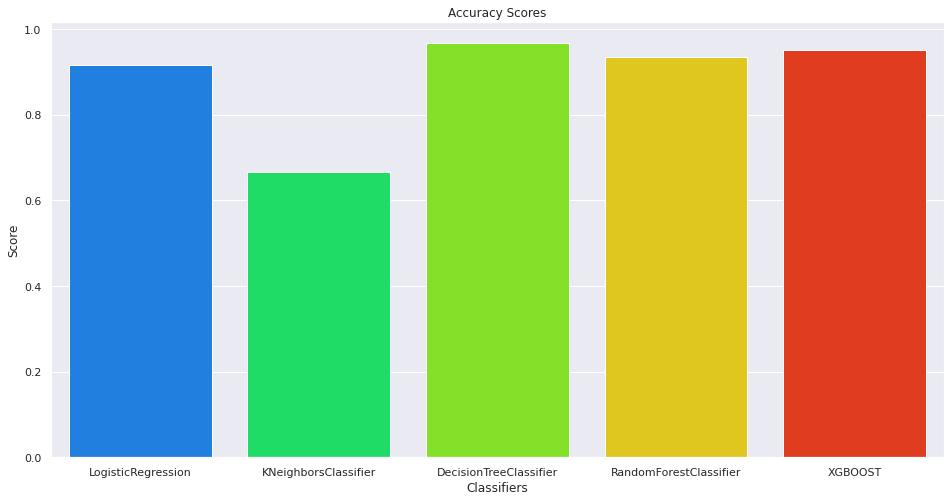

In [ ]:
plt.figure(figsize = (16,8))

sns.barplot(data = result, x = result.index.tolist(),y = 'Accuracy')

plt.title('Accuracy Scores')
plt.xlabel('Classifiers')
plt.ylabel('Score')

plt.show()

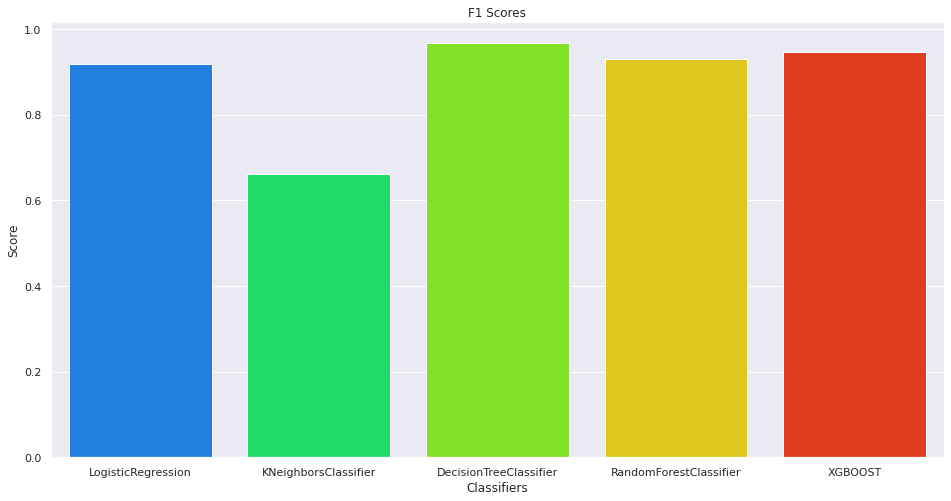

In [ ]:
plt.figure(figsize = (16,8))

sns.barplot(data = result, x = result.index.tolist(),y = 'f1_score')

plt.title('F1 Scores')
plt.xlabel('Classifiers')
plt.ylabel('Score')

plt.show()

### Classification Reports

In [ ]:
# Getting the classification report for each model
clf_report(result)


Classification report : LogisticRegression

              precision    recall  f1-score   support

           0       1.00      0.93      0.96        27
           1       0.75      0.75      0.75         4
           2       0.71      0.83      0.77         6
           3       0.75      0.75      0.75         4
           4       0.95      1.00      0.97        19

    accuracy                           0.92        60
   macro avg       0.83      0.85      0.84        60
weighted avg       0.92      0.92      0.92        60


Classification report : KNeighborsClassifier

              precision    recall  f1-score   support

           0       0.93      0.96      0.95        27
           1       0.38      0.75      0.50         4
           2       0.14      0.17      0.15         6
           3       0.00      0.00      0.00         4
           4       0.67      0.53      0.59        19

    accuracy                           0.67        60
   macro avg       0.42      0.48      

### Confusion Matrix


Confusion Matrix for LogisticRegression
        DrugY  drugC  drugX  drugA  drugB
DrugY     25      0      0      1      1
drugC      0      3      1      0      0
drugX      0      1      5      0      0
drugA      0      0      1      3      0
drugB      0      0      0      0     19

Confusion Matrix for KNeighborsClassifier
        DrugY  drugC  drugX  drugA  drugB
DrugY     26      0      1      0      0
drugC      1      3      0      0      0
drugX      0      0      1      0      5
drugA      0      2      2      0      0
drugB      1      3      3      2     10

Confusion Matrix for DecisionTreeClassifier
        DrugY  drugC  drugX  drugA  drugB
DrugY     27      0      0      0      0
drugC      0      4      0      0      0
drugX      0      2      4      0      0
drugA      0      0      0      4      0
drugB      0      0      0      0     19

Confusion Matrix for RandomForestClassifier
        DrugY  drugC  drugX  drugA  drugB
DrugY     27      0      0      0      0
dr

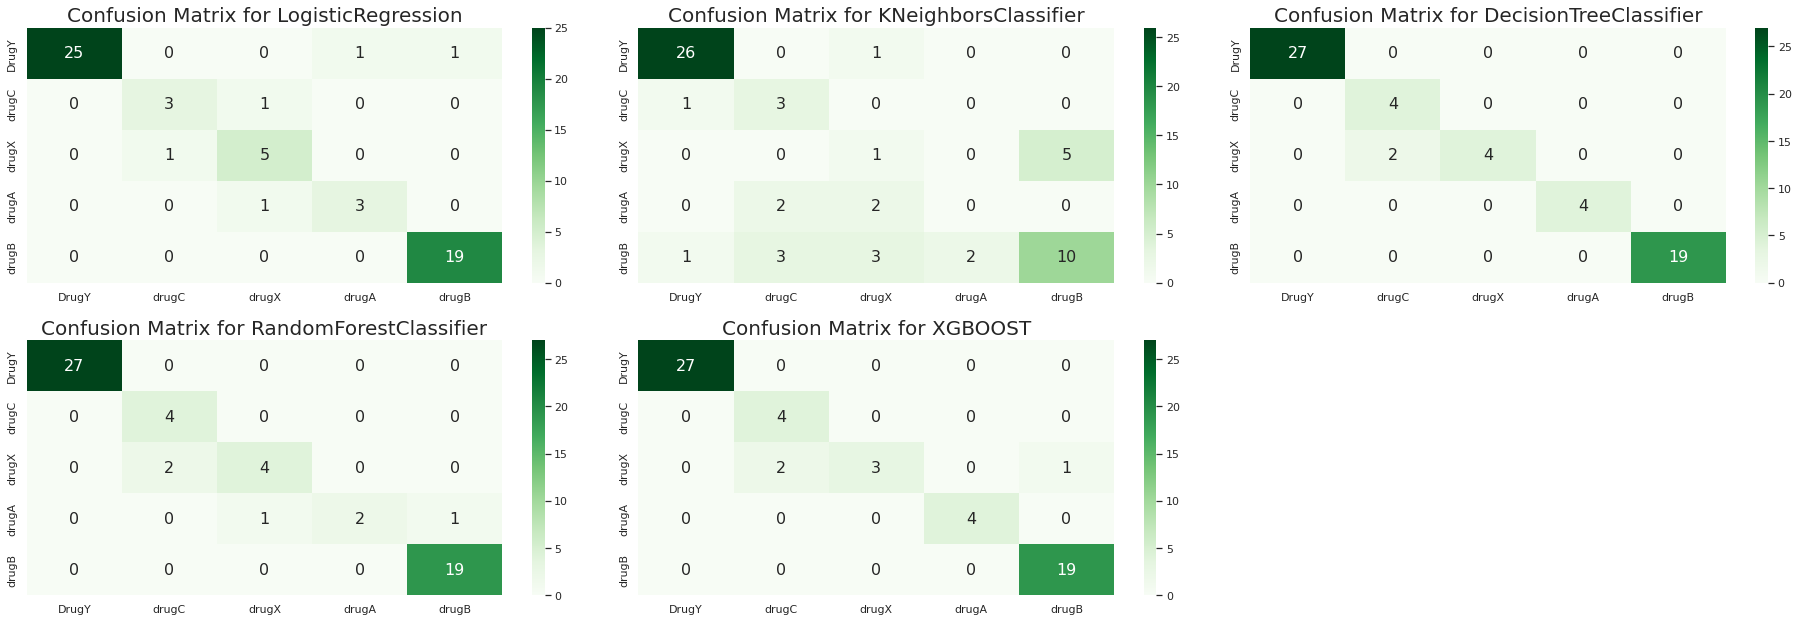

In [ ]:
# getting confusion matrix for each model
confusion_matrix_plot(result)

### Let us tune out Hyperparameters and check the results

In [ ]:
# list of models
models = [LogisticRegression, KNeighborsClassifier, DecisionTreeClassifier, RandomForestClassifier, xgboost]

def hyperparameter_tuner(models):
    
# function that will fit our models and train our models
    scores = []
    for i in models:
        
        if i == LogisticRegression:
            print('\n LogisticRegression \n')
            # Creating instance for our model
            param_log_reg = {'C': [1, 0.5, 0.1, 5, 9],
                             'penalty':['l2','l1', 'elasticnet']}
            
            model = GridSearchCV(estimator = LogisticRegression(), 
                                 param_grid = param_log_reg, 
                                 cv = 3, n_jobs = -1 , 
                                 verbose = 1, scoring = 'recall')
            
            # fitting our model using .fit funtion
            model.fit(x_train,y_train)
            print('\n\n Best parameters by GridSearchCV : ',model.best_params_)
            
            
            
            best_param = model.best_estimator_
            
            # taking prediction from our model using .predict function
            print('\n\nPrediction by Tuned Logistic Regression :\n', best_param.predict(x_test))

            # appending scores to the list
            scores.append(model_results(best_param.predict(x_test)))
            
        elif i == KNeighborsClassifier:
            print('\n KNeighborsClassifier \n')
            # Creating instance for our model
            param_knn = {'n_neighbors':[5,7,9],
                         'weights':['uniform','distance'],
                         'p':[2, 1]}
            
            model = GridSearchCV(estimator = KNeighborsClassifier(), 
                                 param_grid = param_knn, 
                                 cv = 3, n_jobs = -1 , 
                                 verbose = 1, scoring = 'recall')
            
            # fitting our model using .fit funtion
            model.fit(x_train,y_train)
            
            print('\n\n Best parameters by GridSearchCV : ',model.best_params_)
            
            
            
            best_param = model.best_estimator_
            
            # taking prediction from our model using .predict function
            print('Prediction by Tuned KNN Classifier :\n', best_param.predict(x_test))

            # appending scores to the list
            scores.append(model_results(best_param.predict(x_test)))           
        
    
        elif i == DecisionTreeClassifier:
            print('\n DecisionTreeClassifier \n')
            # Creating instance for our model
            param_dt = {"max_depth": [None, 4,9,15,20,50],
                         "min_samples_leaf": [ 1,4,0.1,2,10],
                         "max_features" : [None, 0.2, 0.8, 2.0],
                         "min_samples_split": [2,9,15,25]}
            
            model = GridSearchCV(estimator = DecisionTreeClassifier(), 
                                 param_grid = param_dt, 
                                 cv = 3, n_jobs = -1 , 
                                 verbose = 1, scoring = 'recall')
            
            # fitting our model using .fit funtion
            model.fit(x_train,y_train)
            
            print('\n\n Best parameters by GridSearchCV : ',model.best_params_)
            
                        
            best_param = model.best_estimator_
            
            # taking prediction from our model using .predict function
            print('Prediction by Tuned Decision Tree Classifier :\n', best_param.predict(x_test))

            # appending scores to the list
            
            scores.append(model_results(best_param.predict(x_test))) 
            
            
            
        elif i == RandomForestClassifier:
            
            # Creating instance for our model
            
            print('\n RandomForestClassifier \n')
            param_rf = {"n_estimators":[5,10,15],
                        "max_depth": [2, 3, 4],
                        "min_samples_leaf": [1, 3, 5],
                        "min_samples_split" : [2, 3, 5],
                        "max_features" : ['auto', 'sqrt', 'log2'],
                        "criterion": ['gini', 'entropy']}
            
            model = GridSearchCV(estimator = RandomForestClassifier(), 
                                 param_grid = param_rf, 
                                 cv = 3, n_jobs = -1 , 
                                 verbose = 1, scoring = 'recall')
            
            # fitting our model using .fit funtion
            
            model.fit(x_train,y_train)
            
            print('\n\n Best parameters by GridSearchCV : ',model.best_params_)
            
                        
            best_para= model.best_estimator_
            
            # taking prediction from our model using .predict function
            
            print('Prediction by Tuned Random Forest Classifier :\n', best_para.predict(x_test))
            
            #appending scores to the list
            scores.append(model_results(best_para.predict(x_test))) 
            
        elif i == xgboost:
            # Creating instance for our model
            
            print('\n XGBClassifier \n')
            param_xgb = {"n_estimators":[5,10,15],
                         'learning_rate' : [0.05, 0.10, 0.15],
                         'max_depth' : [5, 7, 9],
                         'min_child_weight' : [3, 5, 7],
                         'gamma' : [0.0, 0.1, 0.2],
                         'colsample_bytree' : [0.3, 0.5, 0.7]
                        }
            
            model = GridSearchCV(estimator = xgboost.XGBClassifier(), 
                                 param_grid = param_xgb, 
                                 cv = 3, n_jobs = -1 , 
                                 verbose = 1, scoring = 'recall')
            
            # fitting our model using .fit funtion
            
            model.fit(x_train,y_train)
            
            print('\n\n Best parameters by GridSearchCV : ', model.best_params_)
            
            
            best_para= model.best_estimator_
            
            # taking prediction from our model using .predict function
            
            print('Prediction by Tuned XGBClassifier :\n', best_para.predict(x_test))
            
            #appending scores to the list
            scores.append(model_results(best_para.predict(x_test)))
            
     
    #printing all the scores for each model
    result = pd.concat(scores).reset_index(drop = True)
    return result.set_index(pd.Series(['LogisticRegression', 'KNeighborsClassifier', 
                                       'DecisionTreeClassifier', 'RandomForestClassifier', 'XGBOOST']))
    

### Model Buiding Using Hyperparameter Tuning

In [ ]:
# Training our model and getting the predictions done by our different models
result_1 = hyperparameter_tuner(models)


 LogisticRegression 

Fitting 3 folds for each of 15 candidates, totalling 45 fits


 Best parameters by GridSearchCV :  {'C': 1, 'penalty': 'l2'}


Prediction by Tuned Logistic Regression :
 [4 0 4 3 0 4 4 0 0 0 4 3 0 4 2 1 4 4 2 0 4 4 4 3 2 4 4 0 2 4 3 0 0 0 1 0 1
 0 0 0 2 0 0 4 2 0 4 4 0 2 0 0 0 0 0 0 4 4 4 1]

 KNeighborsClassifier 

Fitting 3 folds for each of 12 candidates, totalling 36 fits


 Best parameters by GridSearchCV :  {'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}
Prediction by Tuned KNN Classifier :
 [2 0 4 1 0 4 4 0 0 0 3 1 0 0 1 1 1 1 4 0 4 2 4 2 4 0 4 0 2 3 2 0 0 0 1 0 0
 0 0 0 2 0 0 4 4 0 4 1 0 4 0 0 0 0 0 0 2 4 4 4]

 DecisionTreeClassifier 

Fitting 3 folds for each of 480 candidates, totalling 1440 fits


 Best parameters by GridSearchCV :  {'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Prediction by Tuned Decision Tree Classifier :
 [4 0 4 3 0 4 4 0 0 0 4 3 0 0 1 1 4 4 2 0 4 4 4 0 2 4 4 0 3 4 3 0 0 0 1 0 1
 0 0 0 2 

### Matrics Evaluation

In [ ]:
# Training our model and getting the predictions done by our different models after Hyper parameter tuning
result_1

,Accuracy,Recall,Precision,f1_score,y_predicted
LogisticRegression,0.916667,0.916667,0.922262,0.918162,"[4, 0, 4, 3, 0, 4, 4, 0, 0, 0, 4, 3, 0, 4, 2, ..."
KNeighborsClassifier,0.666667,0.666667,0.668254,0.660447,"[2, 0, 4, 1, 0, 4, 4, 0, 0, 0, 3, 1, 0, 0, 1, ..."
DecisionTreeClassifier,0.966667,0.966667,0.977778,0.966667,"[4, 0, 4, 3, 0, 4, 4, 0, 0, 0, 4, 3, 0, 0, 1, ..."
RandomForestClassifier,0.883333,0.883333,0.849689,0.851659,"[4, 0, 4, 4, 0, 4, 4, 0, 0, 0, 4, 4, 0, 0, 1, ..."
XGBOOST,0.700000,0.700000,0.653333,0.632854,"[4, 0, 4, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


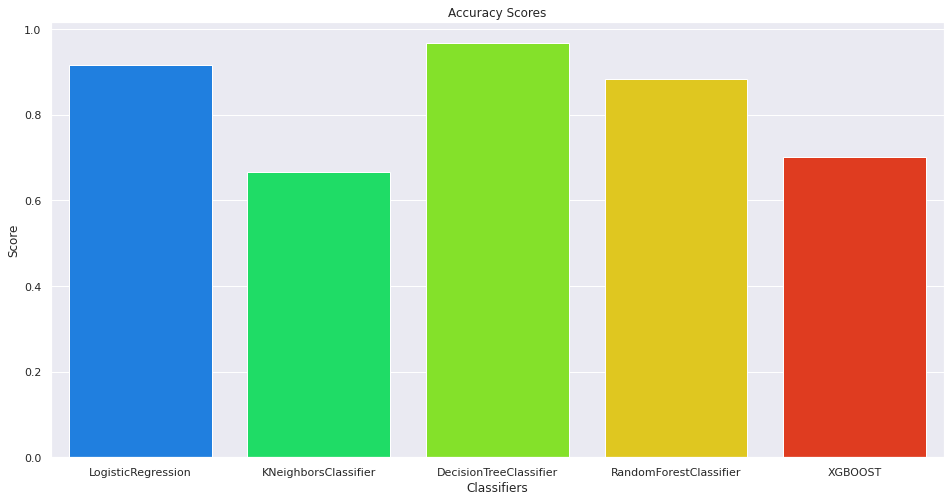

In [ ]:
plt.figure(figsize = (16,8))

sns.barplot(data = result_1, x = result.index.tolist(),y = 'Accuracy')

plt.title('Accuracy Scores')
plt.xlabel('Classifiers')
plt.ylabel('Score')

plt.show()

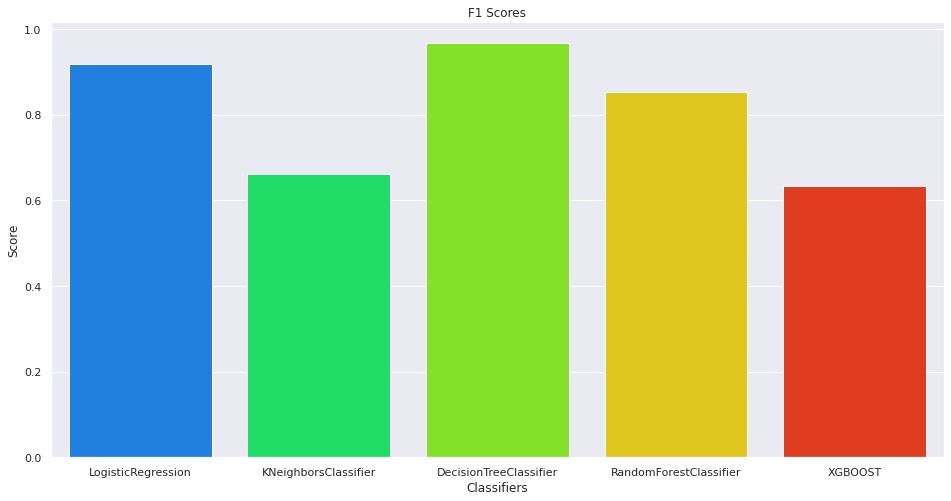

In [ ]:
plt.figure(figsize = (16,8))

sns.barplot(data = result_1, x = result.index.tolist(),y = 'f1_score')

plt.title('F1 Scores')
plt.xlabel('Classifiers')
plt.ylabel('Score')

plt.show()

### Classification Report

In [ ]:
# Getting the classification report for each model
clf_report(result_1)


Classification report : LogisticRegression

              precision    recall  f1-score   support

           0       1.00      0.93      0.96        27
           1       0.75      0.75      0.75         4
           2       0.71      0.83      0.77         6
           3       0.75      0.75      0.75         4
           4       0.95      1.00      0.97        19

    accuracy                           0.92        60
   macro avg       0.83      0.85      0.84        60
weighted avg       0.92      0.92      0.92        60


Classification report : KNeighborsClassifier

              precision    recall  f1-score   support

           0       0.93      0.96      0.95        27
           1       0.38      0.75      0.50         4
           2       0.14      0.17      0.15         6
           3       0.00      0.00      0.00         4
           4       0.67      0.53      0.59        19

    accuracy                           0.67        60
   macro avg       0.42      0.48      

### Confusion Matrix


Confusion Matrix for LogisticRegression
        DrugY  drugC  drugX  drugA  drugB
DrugY     25      0      0      1      1
drugC      0      3      1      0      0
drugX      0      1      5      0      0
drugA      0      0      1      3      0
drugB      0      0      0      0     19

Confusion Matrix for KNeighborsClassifier
        DrugY  drugC  drugX  drugA  drugB
DrugY     26      0      1      0      0
drugC      1      3      0      0      0
drugX      0      0      1      0      5
drugA      0      2      2      0      0
drugB      1      3      3      2     10

Confusion Matrix for DecisionTreeClassifier
        DrugY  drugC  drugX  drugA  drugB
DrugY     27      0      0      0      0
drugC      0      4      0      0      0
drugX      0      2      4      0      0
drugA      0      0      0      4      0
drugB      0      0      0      0     19

Confusion Matrix for RandomForestClassifier
        DrugY  drugC  drugX  drugA  drugB
DrugY     27      0      0      0      0
dr

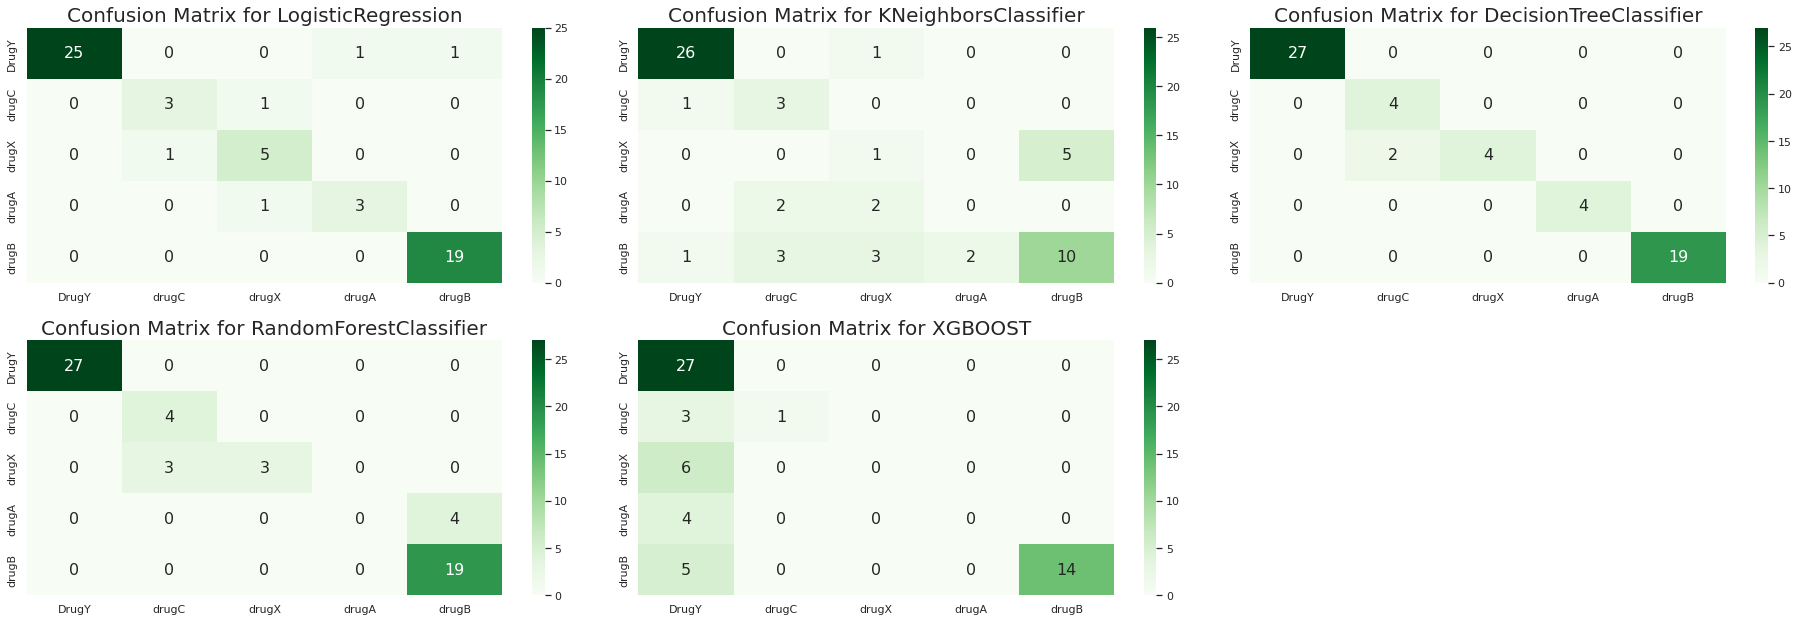

In [ ]:
# getting confusion matrix for each model
confusion_matrix_plot(result_1)

# <b>Another Approach</b>

### Data Preprocessing

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
Y=data['Drug']	
X=data.drop(['Drug'],axis=1)
X=pd.get_dummies(X)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)
Y_train

114    drugX
173    DrugY
5      drugX
126    DrugY
117    drugX
       ...  
106    drugX
14     drugX
92     DrugY
179    DrugY
102    drugC
Name: Drug, Length: 150, dtype: object

In [ ]:
Y

0      DrugY
1      drugC
2      drugC
3      drugX
4      DrugY
       ...  
195    drugC
196    drugC
197    drugX
198    drugX
199    drugX
Name: Drug, Length: 200, dtype: object

In [ ]:
le = LabelEncoder()
le.fit(Y)
Y_new = le.transform(Y)
df = pd.DataFrame({"Y":Y,"Y_new":Y_new}).drop_duplicates()
df

,Y,Y_new
0,DrugY,0
1,drugC,3
3,drugX,4
17,drugA,1
31,drugB,2


In [ ]:
le = LabelEncoder()
le.fit(Y_train)
Y_train = le.transform(Y_train)
le.fit(Y_test)
Y_test = le.transform(Y_test)

In [ ]:
Y_train

array([4, 0, 4, 0, 4, 0, 1, 0, 0, 0, 1, 0, 2, 0, 4, 0, 0, 0, 0, 2, 4, 4,
       4, 2, 1, 4, 0, 4, 1, 4, 3, 0, 1, 1, 1, 2, 2, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 4, 0, 4, 0, 0, 4, 2, 4, 0, 1, 3, 0, 4, 4, 0, 0, 4, 4, 2, 0,
       2, 4, 0, 0, 0, 2, 3, 1, 0, 0, 0, 1, 4, 4, 0, 3, 0, 0, 4, 2, 4, 4,
       0, 0, 0, 0, 0, 0, 2, 4, 3, 1, 0, 1, 1, 4, 0, 0, 0, 0, 4, 0, 1, 4,
       0, 0, 4, 0, 4, 2, 0, 0, 3, 4, 0, 0, 0, 0, 4, 0, 4, 4, 0, 3, 3, 0,
       3, 0, 2, 4, 0, 4, 0, 0, 0, 4, 0, 0, 0, 4, 4, 0, 0, 3])

In [ ]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
print("Shape before adjustment: ", X_train.shape)
X_train, Y_train = oversample.fit_resample(X_train, Y_train)
X_test, Y_test = oversample.fit_resample(X_train, Y_train)
print("Shape afer adjustment: ", X_train.shape)

Shape before adjustment:  (150, 9)
Shape afer adjustment:  (355, 9)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import f1_score,classification_report,confusion_matrix
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score


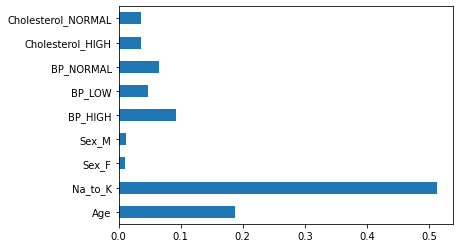

In [ ]:
### Feature Importance
model = ExtraTreesClassifier()
model.fit(X,Y)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.plot(kind='barh')
plt.show()

### Modeling

In [ ]:
modelnames=["LogisticRegression","Decision Tree Classifier","Random Forest Classifier","Extra Trees Classifier","Support Vector Classifier","Naive Bayes","XGBoost Classifier","Light Gradient Boosting Machine Classifier","AdaBoost Classifier"]
models=[LogisticRegression(),DecisionTreeClassifier(),RandomForestClassifier(),ExtraTreesClassifier(),SVC(),GaussianNB(),XGBClassifier(),LGBMClassifier(),AdaBoostClassifier()]
for model in models:
    cvmodel=model
    kf = RepeatedStratifiedKFold(n_splits=5,n_repeats=4, random_state=5)
    cv_scores = cross_val_score(cvmodel, X, Y, cv=kf)
    print("Cross Validation Scores: ",cv_scores)
    model.fit(X_train,Y_train)
    Y_pred_test = model.predict(X_test)
    Y_pred_train = model.predict(X_train)
    print("F1 score of  ",modelnames[models.index(model)]," on test data: ",round(f1_score(Y_test,Y_pred_test,average='weighted')*100,2),"%")
    print("F1 score of ",modelnames[models.index(model)]," on train data: ",round(f1_score(Y_train,Y_pred_train,average='weighted')*100,2),"%")
    print("\n")
    matrix = confusion_matrix(Y_test,Y_pred_test)
    print('Confusion matrix : \n',matrix)
    print("\n")
    report = classification_report(Y_test,Y_pred_test)
    print('Classification Report : \n',report)

Cross Validation Scores:  [0.9   0.875 0.975 0.925 0.95  0.95  0.925 0.9   0.975 0.925 0.8   0.925
 0.975 0.975 0.95  0.975 0.95  0.975 0.9   0.95 ]
F1 score of   LogisticRegression  on test data:  95.16 %
F1 score of  LogisticRegression  on train data:  95.16 %


Confusion matrix : 
 [[61  0  2  4  4]
 [ 0 66  5  0  0]
 [ 0  1 70  0  0]
 [ 0  0  0 71  0]
 [ 1  0  0  0 70]]


Classification Report : 
               precision    recall  f1-score   support

           0       0.98      0.86      0.92        71
           1       0.99      0.93      0.96        71
           2       0.91      0.99      0.95        71
           3       0.95      1.00      0.97        71
           4       0.95      0.99      0.97        71

    accuracy                           0.95       355
   macro avg       0.95      0.95      0.95       355
weighted avg       0.95      0.95      0.95       355

Cross Validation Scores:  [1.    0.975 1.    1.    0.975 0.975 1.    1.    1.    0.975 1.    0.975
 1.    

Logistic Regression gives the best output without much overfitting as other models. Tuning some overfitted models: 

In [ ]:
from sklearn.model_selection import GridSearchCV
tuned_dtc_model=DecisionTreeClassifier(random_state=0)
params_dtc = {  
    "splitter":["best"],
    'max_depth': [10, 20, 50, 100, 200],
    'min_samples_leaf': [10, 20, 50, 100, 200],
    'min_samples_split' : [10, 20, 50, 100, 200],
    'criterion': ["gini", "entropy"]
}
cv=GridSearchCV(tuned_dtc_model,params_dtc,cv=5)
cv.fit(X_train,Y_train)
print(cv.best_params_)

{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 10, 'min_samples_split': 10, 'splitter': 'best'}


In [ ]:
tuned_dtc_model=DecisionTreeClassifier(criterion='gini', max_depth=10, min_samples_leaf= 10, min_samples_split=10, splitter= 'best')
tuned_dtc_model.fit(X_train,Y_train)
Y_pred = tuned_dtc_model.predict(X_test)
Y_pred_train = tuned_dtc_model.predict(X_train)
print("F1 score for test data:",round(f1_score(Y_test,Y_pred,average='weighted')*100,2),"%")
print("Train Accuracy for train data:",round(f1_score(Y_train,Y_pred_train,average='weighted')*100,2),"%")
print("\n")
matrix = confusion_matrix(Y_test,Y_pred, labels=[1,0])
print('Confusion matrix : \n',matrix)
print("\n")
report = classification_report(Y_test,Y_pred, labels=[1,0])
print('Classification Report : \n',report)

F1 score for test data: 100.0 %
Train Accuracy for train data: 100.0 %


Confusion matrix : 
 [[71  0]
 [ 0 71]]


Classification Report : 
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        71
           0       1.00      1.00      1.00        71

   micro avg       1.00      1.00      1.00       142
   macro avg       1.00      1.00      1.00       142
weighted avg       1.00      1.00      1.00       142



### Using AutoML 

In [ ]:
!pip install tpot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 87 kB 3.2 MB/s 
     |████████████████████████████████| 139 kB 34.8 MB/s 
     |████████████████████████████████| 255.9 MB 40 kB/s 
  Created wheel for stopit: filename=stopit-1.1.2-py3-none-any.whl size=11956 sha256=d75826afb6f7ff422710e8f04eb978451a3edcf68040bf176191f709af0a7d00
  Stored in directory: /root/.cache/pip/wheels/e2/d2/79/eaf81edb391e27c87f51b8ef901ecc85a5363dc96b8b8d71e3
Successfully built stopit
  Attempting uninstall: xgboost
    Found existing installation: xgboost 0.90
    Uninstalling xgboost-0.90:
      Successfully uninstalled xgboost-0.90


In [ ]:
import tpot

In [ ]:
from tpot import TPOTClassifier
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=4, random_state=1)
model = TPOTClassifier(generations=5, population_size=50, cv=cv,  verbosity=2, random_state=1, n_jobs=-1,scoring='f1_macro')
# perform the search
model.fit(X, Y)
# export the best model
model.export('tpot_best_model.py')

Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.9868268055636478

Generation 2 - Current best internal CV score: 0.9868268055636478

Generation 3 - Current best internal CV score: 0.9868268055636478

Generation 4 - Current best internal CV score: 0.9868268055636478

Generation 5 - Current best internal CV score: 0.9868268055636478

Best pipeline: RandomForestClassifier(input_matrix, bootstrap=False, criterion=gini, max_features=0.45, min_samples_leaf=8, min_samples_split=7, n_estimators=100)


In [ ]:
tuned_dtc_model=DecisionTreeClassifier(criterion='gini', max_depth=6, min_samples_leaf=7, min_samples_split=18)
tuned_dtc_model.fit(X_train,Y_train)
Y_pred = tuned_dtc_model.predict(X_test)
Y_pred_train = tuned_dtc_model.predict(X_train)
print("F1 score for test data:",round(f1_score(Y_test,Y_pred,average='weighted')*100,2),"%")
print("F1 score for train data:",round(f1_score(Y_train,Y_pred_train,average='weighted')*100,2),"%")
print("\n")
matrix = confusion_matrix(Y_test,Y_pred, labels=[1,0])
print('Confusion matrix : \n',matrix)
print("\n")
report = classification_report(Y_test,Y_pred, labels=[1,0])
print('Classification Report : \n',report)

F1 score for test data: 100.0 %
F1 score for train data: 100.0 %


Confusion matrix : 
 [[71  0]
 [ 0 71]]


Classification Report : 
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        71
           0       1.00      1.00      1.00        71

   micro avg       1.00      1.00      1.00       142
   macro avg       1.00      1.00      1.00       142
weighted avg       1.00      1.00      1.00       142

